## 첫번째 신경망 훈련하기: 기초적인 분류 문제
- 운동화나 셔츠 같은 옷 이미지를 분류하는 신경망 모델 훈련

In [1]:
try:
  %tensorflow_version 2.x
except Exception:
  pass

TensorFlow 2.x selected.


In [2]:
from __future__ import absolute_import, division, print_function, unicode_literals

import tensorflow as tf
from tensorflow import keras

import numpy as np
import matplotlib.pyplot as plt

print(tf.__version__)

2.1.0-rc1


### 패션 MNIST 데이터셋 임포트하기
- [패션 MNIST](https://github.com/zalandoresearch/fashion-mnist) 사용
  - 10개의 범주(category), 70,000개의 흑백이미지로 구성
  - 이미지 해상도(28x28 픽셀), 0~255사이의 값
  - 훈련이미지: 60,000개 사용
  - 평가이미지: 10,000개 사용
  - 레이블: 0~9까지의 정수배열, 옷의 클래스를 나타냄
    - 0: T-shirt/top
    - 1: Trouser
    - 2: Pullover
    - 3: Dress
    - 4: Coat
    - 5: Sandal
    - 6: Shirt
    - 7: Sneaker
    - 8: Bag
    - 9: Ankle boot

In [3]:
fashion_mnist = keras.datasets.fashion_mnist
(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()

4423680/4422102 [==============================] - 0s 0us/step


In [4]:
print(type(train_images)) # load_data()가 numpy배열을 반환
print(train_images.shape, train_labels.shape) # 훈련세트
print(test_images.shape, test_labels.shape) # 테스트세트

<class 'numpy.ndarray'>
(60000, 28, 28) (60000,)
(10000, 28, 28) (10000,)


In [0]:
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

### 데이터 탐색
- 훈련세트: 60,000개 이미지

In [6]:
train_images.shape

(60000, 28, 28)

In [7]:
len(train_labels)

60000

In [8]:
train_labels  # label: 0~9사이의 정수

array([9, 0, 0, ..., 3, 0, 5], dtype=uint8)

- 테스트세트: 10,000개 이미지

In [9]:
test_images.shape

(10000, 28, 28)

In [10]:
len(test_labels)

10000

### 데이터 전처리
- 첫번째 훈련 이미지 시각화: 픽셀의 범위가 0~255사이

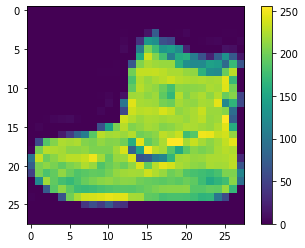

In [11]:
plt.figure()
plt.imshow(train_images[0])
plt.colorbar()
plt.grid(False)
plt.show()

- 신경망 모델에 주입하기 위해 픽셀의 범위를 0~1사이로 조정
  - 훈련세트와 테스트세트를 동일한 방식으로 전처러하는 것이 좋음

In [0]:
train_images = train_images / 255.0
test_images = test_images / 255.0

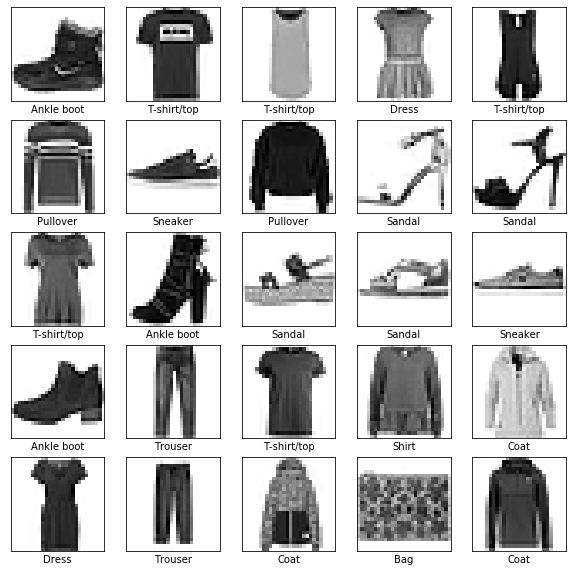

In [13]:
plt.figure(figsize=(10,10))

# 훈련세트 처음 25개 이미지 출력
for i in range(25):
  plt.subplot(5,5, i+1)
  plt.xticks([])
  plt.yticks([])
  plt.grid(False)
  plt.imshow(train_images[i], cmap=plt.cm.binary)
  plt.xlabel(class_names[train_labels[i]])
plt.show()

### 모델 구성
**층설정**
- 층(layer): 신경망의 기본 구성요소, 주입된 데이터에서 더 의미있는 표현(representation)을 추출
  - [`tf.keras.layers.Flatten`](https://www.tensorflow.org/api_docs/python/tf/keras/layers/Flatten): 데이터 변환만 수행, 1차원 배열로 변환
  - [`tf.keras.layers.Dense`](https://www.tensorflow.org/api_docs/python/tf/keras/layers/Dense): 밀집 연결(densely-connected) 또는 완전 연결(full-connected)층이라고 불림

In [0]:
model = keras.Sequential([
                         keras.layers.Flatten(input_shape=(28, 28)),
                         keras.layers.Dense(128, activation='relu'),
                         keras.layers.Dense(10, activation='softmax') # 10개의 확률을 반환, 전체합은 1
])

**모델 컴파일**
- 모델 훈련 전 필요한 설정
  - 손실함수(Loss function): 훈련하는 동안 모델의 오차를 측정, 모델의 학습이 올바른 방향으로 향하도록 함수 최소화가 필요
  - 옵티마이저(Optimize): 데이터와 손실함수를 바탕으로 모델의 업데이트 방법을 결정
  - 지표(Metrics): 훈련단계와 테스트 단계를 모니터링하게 사용

In [0]:
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

### 모델 훈련
1. 훈련데이터를 모델에 주입: train_images, train_labels
2. 모델이 이미와 레이블을 매핑하는 방법을 배움
3. 테스트 세트에 대한 모델의 예측을 만듦: test_images에 해당
4. 테스트 세트에 대한 예측이 레이블과 맞는지 확인: test_labels와 비교

In [16]:
model.fit(train_images, train_labels, epochs=5)

Train on 60000 samples
Epoch 1/5
60000/60000 [==============================] - 6s 100us/sample - loss: 0.4960 - accuracy: 0.8260
Epoch 2/5
60000/60000 [==============================] - 4s 69us/sample - loss: 0.3721 - accuracy: 0.8658
Epoch 3/5
60000/60000 [==============================] - 4s 68us/sample - loss: 0.3374 - accuracy: 0.8762
Epoch 4/5
60000/60000 [==============================] - 4s 67us/sample - loss: 0.3133 - accuracy: 0.8848
Epoch 5/5
60000/60000 [==============================] - 4s 72us/sample - loss: 0.2945 - accuracy: 0.8917


### 정확도 평가
- 테스트 세트에서 모델의 성능을 비교하는 것
  - 훈련세트의 정확도와 테스트 세트의 정확도 사이의 차이는 과대적합(overfitting) 때문
    - 과대적합은 머신러닝 모델이 훈련 데이터보다 새로운 데이터에서 성능이 낮아지는 현상

In [17]:
test_loss, test_acc = model.evaluate(test_images, test_labels, verbose=2)
print('\n테스트 정확도:', test_acc)

10000/10000 - 1s - loss: 0.3555 - accuracy: 0.8744

테스트 정확도: 0.8744


### 예측 만들기

In [0]:
predictions = model.predict(test_images)

In [19]:
predictions[0]

array([5.4779186e-05, 1.9705626e-08, 4.5254851e-08, 1.0074039e-08,
       1.4064354e-07, 3.9456915e-03, 1.5197660e-06, 9.9437140e-02,
       1.1629425e-06, 8.9655954e-01], dtype=float32)

In [20]:
np.argmax(predictions[0])

9

In [21]:
test_labels[0]

9

In [0]:
def plot_image(i, predictions, true_label, img):
  prediction_array, true_label, img = predictions[i], true_label[i], img[i]
  plt.grid(False)
  plt.xticks([])
  plt.yticks([])

  plt.imshow(img, cmap=plt.cm.binary)
  
  predicted_label = np.argmax(prediction_array)
  if predicted_label == true_label:
    color = 'blue'
  else:
    color = 'red'

  plt.xlabel("{} {:2.0f}% ({})".format(class_names[predicted_label],
                                       100*np.max(prediction_array),
                                       class_names[true_label]),
                                       color=color)

def plot_value_array(i, predictions_array, true_label):
  predictions_array, true_label = predictions_array[i], true_label[i]
  plt.grid(False)
  plt.xticks([])
  plt.yticks([])
  thisplot = plt.bar(range(10), predictions_array, color="#777777")
  plt.ylim([0,1])
  predicted_label = np.argmax(predictions_array)

  thisplot[predicted_label].set_color('red')
  thisplot[true_label].set_color('blue')

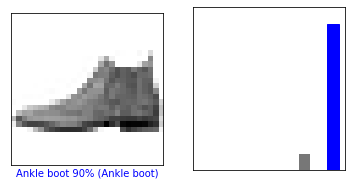

In [23]:
i=0
plt.figure(figsize=(6,3))
plt.subplot(1,2,1)
plot_image(i, predictions, test_labels, test_images)
plt.subplot(1,2,2)
plot_value_array(i, predictions, test_labels)
plt.show()

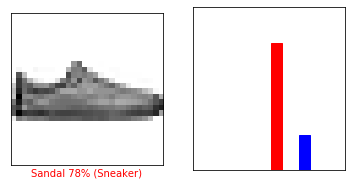

In [24]:
i=12
plt.figure(figsize=(6,3))
plt.subplot(1,2,1)
plot_image(i, predictions, test_labels, test_images)
plt.subplot(1,2,2)
plot_value_array(i, predictions, test_labels)
plt.show()

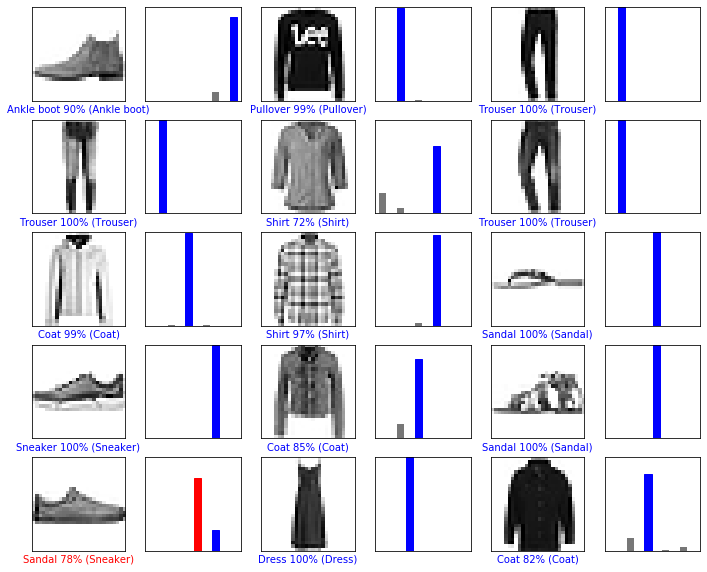

In [25]:
num_rows = 5
num_cols = 3

num_images = num_rows*num_cols

plt.figure(figsize=(2*2*num_cols, 2*num_rows))
for i in range(num_images):
  plt.subplot(num_rows, 2*num_cols, 2*i+1)
  plot_image(i, predictions, test_labels, test_images)
  plt.subplot(num_rows, 2*num_cols, 2*i+2)
  plot_value_array(i, predictions, test_labels)
plt.show()


**마지막 모델을 사용하여 한 이미지에 대한 예측을 만듦**

In [30]:
img = test_images[0]
print(img.shape)

(28, 28)


- tf.keras 모델은 한번에 샘플의 묶음 또는 배치(batch)로 예측을 만드는데 최적화 되어 있음
(하나의 이미지를 사용할 때도 2차원 배열로 만들어야 함)

In [31]:
img = (np.expand_dims(img, 0))
print(img.shape)

(1, 28, 28)


In [36]:
predictions_single = model.predict(img)
print(predictions_single.shape)
print(predictions_single)

(1, 10)
[[5.4779186e-05 1.9705663e-08 4.5254851e-08 1.0074039e-08 1.4064381e-07
  3.9456934e-03 1.5197660e-06 9.9437140e-02 1.1629446e-06 8.9655954e-01]]


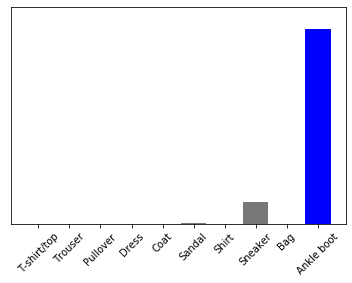

In [35]:
plot_value_array(0, predictions_single, test_labels)
_ = plt.xticks(range(10), class_names, rotation=45)

In [38]:
np.argmax(predictions_single[0])

9